**Data Exploration**

Install ucimlrepo to import the data directly into the code

In [1]:
pip install ucimlrepo

import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from ucimlrepo import fetch_ucirepo
%matplotlib inline

In [3]:


# fetch dataset
mushroom = fetch_ucirepo(id=73)

# data (as pandas dataframes)
X = mushroom.data.features
y = mushroom.data.targets

# metadata
print(mushroom.metadata)

# variable information
print(mushroom.variables)


{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

In [4]:
#print the feaures and target data
print(X,y)

     cap-shape cap-surface cap-color bruises odor gill-attachment  \
0            x           s         n       t    p               f   
1            x           s         y       t    a               f   
2            b           s         w       t    l               f   
3            x           y         w       t    p               f   
4            x           s         g       f    n               f   
...        ...         ...       ...     ...  ...             ...   
8119         k           s         n       f    n               a   
8120         x           s         n       f    n               a   
8121         f           s         n       f    n               a   
8122         k           y         n       f    y               f   
8123         x           s         n       f    n               a   

     gill-spacing gill-size gill-color stalk-shape  ...  \
0               c         n          k           e  ...   
1               c         b          k           e  .

In [5]:
# Check for missing values in the features dataset
print(X.isnull().sum())


cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64


In [6]:
# View information of the features dataset
print(X.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [7]:
# Impute missing values with the mode
X = X.fillna(X.mode().iloc[0])


In [8]:
# Summary statistics of the features
print(X.describe(include='all'))


       cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count       8124        8124      8124    8124  8124            8124   
unique         6           4        10       2     9               2   
top            x           y         n       f     n               f   
freq        3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color stalk-shape  ...  \
count          8124      8124       8124        8124  ...   
unique            2         2         12           2  ...   
top               c         b          b           t  ...   
freq           6812      5612       1728        4608  ...   

       stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring  \
count                      8124                   8124                   8124   
unique                        4                      9                      9   
top                           s                      w                      w   
freq     

In [9]:
# Unique values for each categorical feature
for col in X.columns:
    print(f"Unique values in {col}: {X[col].unique()}")


Unique values in cap-shape: ['x' 'b' 's' 'f' 'k' 'c']
Unique values in cap-surface: ['s' 'y' 'f' 'g']
Unique values in cap-color: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
Unique values in bruises: ['t' 'f']
Unique values in odor: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
Unique values in gill-attachment: ['f' 'a']
Unique values in gill-spacing: ['c' 'w']
Unique values in gill-size: ['n' 'b']
Unique values in gill-color: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
Unique values in stalk-shape: ['e' 't']
Unique values in stalk-root: ['e' 'c' 'b' 'r']
Unique values in stalk-surface-above-ring: ['s' 'f' 'k' 'y']
Unique values in stalk-surface-below-ring: ['s' 'f' 'y' 'k']
Unique values in stalk-color-above-ring: ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
Unique values in stalk-color-below-ring: ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
Unique values in veil-type: ['p']
Unique values in veil-color: ['w' 'n' 'o' 'y']
Unique values in ring-number: ['o' 't' 'n']
Unique values in ring-type: ['p' 'e' 

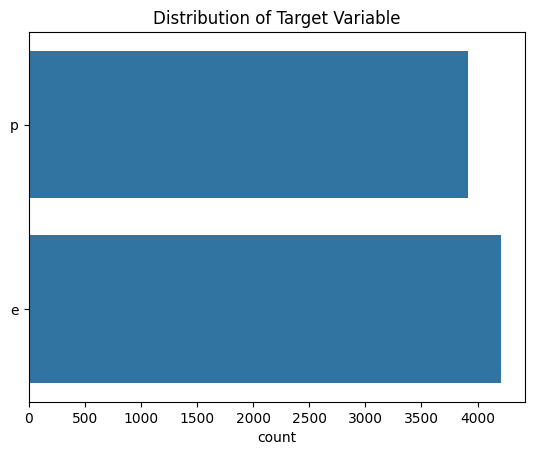

In [10]:
# Countplot for the target variable
sns.countplot(y.values.flatten())
plt.title('Distribution of Target Variable')
plt.show()

In [11]:
# Label encode the categorical features
label_encoders = {}
for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [12]:
# Encode the target variable
le_y = LabelEncoder()
y = le_y.fit_transform(y.values.flatten())

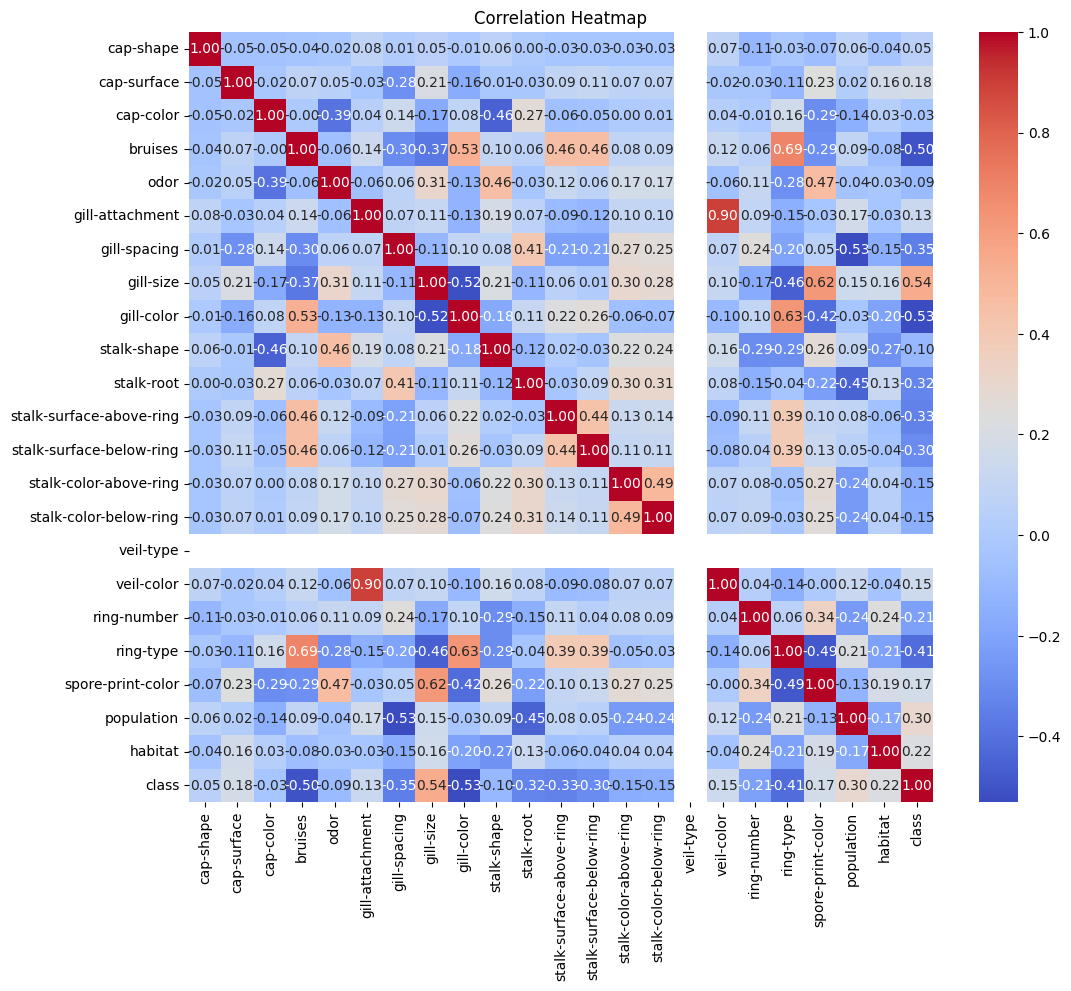

In [13]:
# Combine X and y for correlation analysis
mushroom_df = X.copy()
mushroom_df['class'] = y

# Calculate the correlation matrix
corr_matrix = mushroom_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

MODEL DEFINITION
SUPPORT VECTOR MACHINE

In [14]:
# 1. Support Vector Machine (SVM)
# Define the SVM model
svm = SVC()

# Define the hyperparameters grid
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

In [15]:
# Perform Grid Search to find the best hyperparameters
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X, y)

# Best hyperparameters
best_params_svm = grid_search_svm.best_params_

In [16]:
# Fit SVM with best hyperparameters
svm_best = SVC(**best_params_svm, probability=True)
svm_best.fit(X, y)


SVC(C=10, kernel='linear', probability=True)

In [17]:
# Predictions
y_pred_svm = svm_best.predict(X)

In [18]:
# Confusion matrix
cm_svm = confusion_matrix(y, y_pred_svm)

In [19]:

# Accuracy
accuracy_svm = accuracy_score(y, y_pred_svm)

In [20]:
# Classification report
classification_report_svm = classification_report(y, y_pred_svm)

print(f"Best hyperparameters for SVM: {best_params_svm}")
print(f"Confusion Matrix for SVM:\n{cm_svm}")
print(f"Accuracy for SVM: {accuracy_svm * 100:.2f}%")
print(f"Classification Report for SVM:\n{classification_report_svm}")

Best hyperparameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Confusion Matrix for SVM:
[[4128   80]
 [   0 3916]]
Accuracy for SVM: 99.02%
Classification Report for SVM:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4208
           1       0.98      1.00      0.99      3916

    accuracy                           0.99      8124
   macro avg       0.99      0.99      0.99      8124
weighted avg       0.99      0.99      0.99      8124



RANDOM FOREST MODEL DEFINITON

In [21]:
# 2. Random Forest
# Define the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameters grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [22]:

# Perform Grid Search to find the best hyperparameters
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X, y)

# Best hyperparameters
best_params_rf = grid_search_rf.best_params_

In [23]:
# Fit Random Forest with best hyperparameters
rf_best = RandomForestClassifier(**best_params_rf, random_state=42)
rf_best.fit(X, y)

# Predictions
y_pred_rf = rf_best.predict(X)


In [24]:
# Confusion matrix
cm_rf = confusion_matrix(y, y_pred_rf)

In [25]:
# Accuracy
accuracy_rf = accuracy_score(y, y_pred_rf)

In [26]:
# Classification report
classification_report_rf = classification_report(y, y_pred_rf)

print(f"Best hyperparameters for Random Forest: {best_params_rf}")
print(f"Confusion Matrix for Random Forest:\n{cm_rf}")
print(f"Accuracy for Random Forest: {accuracy_rf * 100:.2f}%")
print(f"Classification Report for Random Forest:\n{classification_report_rf}")

Best hyperparameters for Random Forest: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Confusion Matrix for Random Forest:
[[4208    0]
 [   0 3916]]
Accuracy for Random Forest: 100.00%
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4208
           1       1.00      1.00      1.00      3916

    accuracy                           1.00      8124
   macro avg       1.00      1.00      1.00      8124
weighted avg       1.00      1.00      1.00      8124



DECISION TREE MODEL


In [27]:

# 3. Decision Tree
# Define the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters grid
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [28]:
# Perform Grid Search to find the best hyperparameters
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X, y)

# Best hyperparameters
best_params_dt = grid_search_dt.best_params_

In [29]:
# Fit Decision Tree with best hyperparameters
dt_best = DecisionTreeClassifier(**best_params_dt, random_state=42)
dt_best.fit(X, y)

# Predictions
y_pred_dt = dt_best.predict(X)


In [30]:
# Confusion matrix
cm_dt = confusion_matrix(y, y_pred_dt)


In [31]:
# Accuracy
accuracy_dt = accuracy_score(y, y_pred_dt)

In [32]:
# Classification report
classification_report_dt = classification_report(y, y_pred_dt)

print(f"Best hyperparameters for Decision Tree: {best_params_dt}")
print(f"Confusion Matrix for Decision Tree:\n{cm_dt}")
print(f"Accuracy for Decision Tree: {accuracy_dt * 100:.2f}%")
print(f"Classification Report for Decision Tree:\n{classification_report_dt}")

Best hyperparameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Confusion Matrix for Decision Tree:
[[4208    0]
 [   0 3916]]
Accuracy for Decision Tree: 100.00%
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4208
           1       1.00      1.00      1.00      3916

    accuracy                           1.00      8124
   macro avg       1.00      1.00      1.00      8124
weighted avg       1.00      1.00      1.00      8124

